# Домашняя контрольная работа. Вариант 38

In [3]:
import numpy as np
import scipy as sc
import array_to_latex as a2l
from pytexit import py2tex

In [47]:
to_tex = lambda A : a2l.to_ltx(A, frmt = '{:6.4f}', arraytype = 'array', mathform=True)

## Задача №1

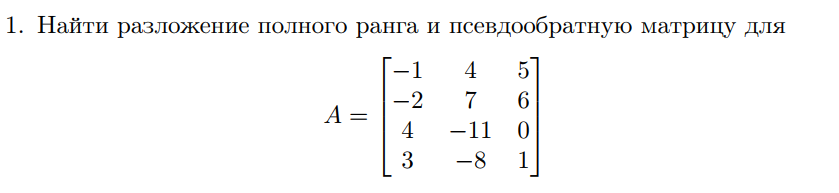

Скелетное разложение найдем приведя матрицу к приведенному виду. Далее по теореме напишем скелетное разложение.

$$
\begin{bmatrix}                        
    1.00 &  -4.00 & -5.00\\              
    -2.00 &  7.00 & 6.00\\            
     4.00 & -11.00 & 0.00\\              
     3.00 &  -8.00 & 1.00                
\end{bmatrix}
==>
\begin{bmatrix}
    1.00 &  -4.00 &  -5.00\\
    1.00 &  -3.50 &  -3.00\\
    1.00 &  -2.75 &    0.00\\
    1.00 &  -2.67 &    0.33
\end{bmatrix}
==>
\begin{bmatrix}
    1.00 &  -4.00 & -5.00\\
    0.00 &  \frac{1}{2} & 2\\
    1.00 &  \frac{-11}{4} & 0\\
    1.00 &  \frac{-8}{3} & \frac{1}{3}
\end{bmatrix}
$$

$$
\begin{bmatrix}
    1.00 &  -4.00 & -5.00\\
    0.00 &  \frac{1}{2} & 2\\
    0.00 &  \frac{5}{4} & 5\\
    0.00 &  \frac{4}{3} & \frac{16}{3}
\end{bmatrix}
==>
\begin{bmatrix}
    1.00 &  -4.00 & -5.00\\
    0.00 &  1 & 4\\
    0.00 &  \frac{5}{4} & 5\\
    0.00 &  \frac{4}{3} & \frac{16}{3}
\end{bmatrix}
==>
\begin{bmatrix}
    1.00 &  -4.00 & -5.00\\
    0.00 &  1 & 4\\
    0.00 &  1 & 4\\
    0.00 &  1 & 4
\end{bmatrix}
$$

$$
\begin{bmatrix}
    1.00 &  -4.00 & -5.00\\
    0.00 &  1 & 4\\
    0.00 &  0 & 0\\
    0.00 &  0 & 0
\end{bmatrix}
==>
\begin{bmatrix}
    1 &  0 & 11\\
    0 &  1 & 4\\
    0 &  0 & 0\\
    0 &  0 & 0
\end{bmatrix}
$$

$$A = FG$$ 

$$
F = 
\begin{bmatrix}
    -1 &  4 \\              
    -2 &  7 \\            
     4 & -11 \\              
     3 &  -8  
\end{bmatrix}
$$

$$
G =
\begin{bmatrix}
    1 &  0 & 11\\
    0 &  1 & 4
\end{bmatrix}
$$

Найдем псевдообратную матрицу через скелетное разложение
1. Найдем $F^+$ и $G^+$
    * $F^+$=$(F^T \cdot F)^{-1} \cdot F^T$
    * $G^+$=$G^T \cdot (G \cdot G^T)^{-1}$
    
    
2. $A^+ = G^+ \cdot F^+$

In [43]:
F = np.array([[-1,4], [-2,7], [4,-11], [3,-8]])
G = np.array([[1,0,11], [0,1,4]])
F_inv = np.linalg.inv((F.T).dot(F)).dot(F.T)
G_inv =(G.T).dot(np.linalg.inv(G.dot(G.T)))
A_inv = G_inv.dot(F_inv)
A_inv_true = np.linalg.pinv([[-1,4,5],[-2,7,6],[4,-11,0],[3,-8,1]])
# проверка
np.isclose(A_inv,A_inv_true)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

Ответ:
$$
A^+= 
\begin{bmatrix}                        
 0.0071 &  0.0043 &  0.0210 &  0.0183\\
  0.0008 &  0.0103 & -0.0465 & -0.0371\\
  0.0815 &  0.0888 &  0.0453 &  0.0525             
\end{bmatrix}
$$

## Задача №2

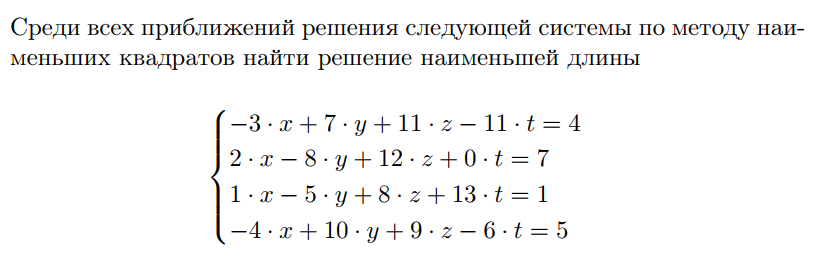

$$
A=
\begin{bmatrix}
    -3 &  7 & 11 & -11\\
    2 &  -8 & 12 & 0\\
    1 &  -5 & 8 & 13\\
    -4 & 10 &  9 & -6
\end{bmatrix}
$$

1. Найдем псевдообратную матрицу. Легче всего это сделать через разложение полного ранга.
    1. Приведем матрицу к ступенчатому виду
    2. Найдем матрицы $F$ и $G$
    3.  Найдем $F^+$ и $G^+$
        * $F^+$=$(F^T \cdot F)^{-1} \cdot F^T$
        * $G^+$=$G^T \cdot (G \cdot G^T)^{-1}$
    4. $A^+ = G^+ \cdot F^+$
2. $X=A^+ \cdot B$, где $B$ - это вектор столбец из свободных членов

**Приведенная матрица:**
$$
A=
\begin{bmatrix}
    -3 &  7 & 11 & -11\\
    2 &  -8 & 12 & 0\\
    1 &  -5 & 8 & 13\\
    -4 & 10 &  9 & -6
\end{bmatrix}
==>
\begin{bmatrix}
    1 &	0 &	0 &	-60\\
    0 &	1 &	0 &	−21\\
    0 &	0 &	1 &	−4\\
    0 &	0 &	0 &	0
\end{bmatrix}
$$

**F и G:**

$$A = FG$$ 

$$
F = 
\begin{bmatrix}
    -3 &  7 & 11\\
    2 &  -8 & 12\\
    1 &  -5 & 8\\
    -4 & 10 &  9
\end{bmatrix}
$$

$$
G =
\begin{bmatrix}
    1 &	0 &	0 &	-60\\
    0 &	1 &	0 &	−21\\
    0 &	0 &	1 &	−4\\
\end{bmatrix}
$$


In [51]:
F = np.array([[-3,7,11], [2,-8,12], [1,-5,8], [-4,10,9]])
G = np.array([[1,0,0,-60], [0,1,0,-21], [0,0,1,-4]]) 
F_inv = np.linalg.inv((F.T).dot(F)).dot(F.T)
G_inv =(G.T).dot(np.linalg.inv(G.dot(G.T)))
A_inv = G_inv.dot(F_inv)

$$
A^+ = 
\begin{bmatrix}
 -0.0022 &  0.0199 & -0.0121 & -0.0196\\
  0.0034 & -0.0607 &  0.0261 &  0.0513\\
  0.0218 &  0.0295 &  0.0276 &  0.0201\\
 -0.0264 & -0.0355 &  0.0647 &  0.0220
\end{bmatrix}
$$

In [52]:
x, y, z, t = A_inv.dot(np.array([4,7,1,5]))

$$
x = 0.02\\
y = -0.1289\\
z = 0.4219\\
t = -0.1794
$$

**Проверка:**

In [65]:
A = np.array([[-3,7,11,-11], [2,-8,12,0], [1,-5,8,13], [-4,10,9,-6]])
B = np.array([4,7,1,5])
true_answ = np.linalg.lstsq(A,B, rcond=None)[0]
x_t, y_t, z_t, t_t = true_answ
np.isclose([x, y, z, t], [x_t, y_t, z_t, t_t])

array([ True,  True,  True,  True])

## Задача №3

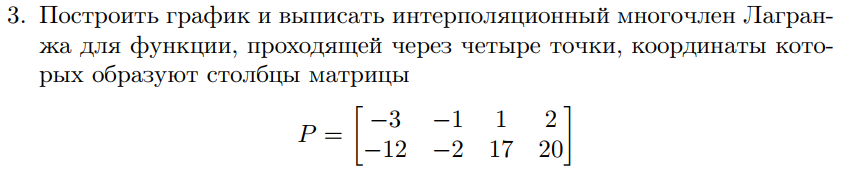

**Напишем уравнения базисных полиномов:**

$$l_0(x) =  \frac{x-x_1}{x_0-x_1} \ \frac{x-x_2}{x_0-x_2} \ \frac{x-x_3}{x_0-x_3} = \frac{x+1}{1-3} \ \frac{x-1}{-3-1} \ \frac{x-2}{-3-2}=\frac{-1-x}{2} \ \frac{1-x}{4} \ \frac{2-x}{5} = - \frac{1}{40} \ [(x+1)(x-1)(x-2)]$$

$$l_1(x) = \frac{x-x_0}{x_1-x_0} \ \frac{x-x_2}{x_1-x_2} \ \frac{x-x_3}{x_1-x_3}=\frac{x+3}{2} \ \frac{1-x}{2} \ \frac{2-x}{3}=-\frac{1}{12} \ [(x+3)(x-1)(x-2)]$$

$$l_2(x) = \frac{x-x_0}{x_2-x_0} \ \frac{x-x_1}{x_2-x_1} \ \frac{x-x_3}{x_2-x_3}=\frac{x+3}{4} \ \frac{x+1}{2} \ \frac{2-x}{1}=\frac{1}{8} \ [(x+3)(x+1)(2-x)]$$

$$l_3(x) = \frac{x-x_0}{x_3-x_0} \ \frac{x-x_1}{x_3-x_1} \ \frac{x-x_2}{x_3-x_2}=\frac{x+3}{5} \ \frac{x+1}{3} \ \frac{x-1}{1}=\frac{1}{15} \ [(x+3)(x+1)(x-1)]$$

Получим:
$$L(x)=\frac{3}{10} \ [(x+1)(x-1)(x-2)] + \frac{1}{6} \ [(x+3)(x-1)(x-2)] + \frac{17}{8} \ [(x+3)(x+1)(2-x)] + \frac{4}{3} \ [(x+3)(x+1)(x-1)]$$

In [81]:
def draw_func():
    import matplotlib.pyplot as plt

    x = np.linspace(-5,5,100)

    # the function, which is y = x^2 here
    y = 3/10*((x+1)*(x-1)*(x-2)) + 1/6 *((x+3)*(x-1)*(x-2)) + 17/8*((x+3)*(x+1)*(2-x)) + 4/3*((x+3)*(x+1)*(x-1))

    # setting the axes at the centre
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x,y, 'r')
    plt.title('Интерполяционный многочлен Лангранжа', fontsize=16)

    # show the plot
    plt.show();

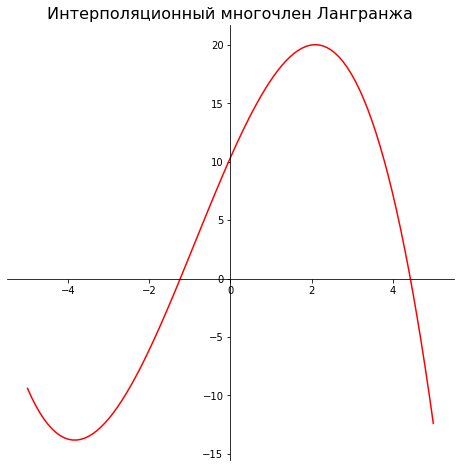

In [82]:
draw_func()

## Задача №4

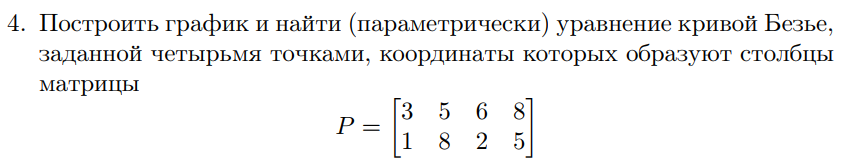

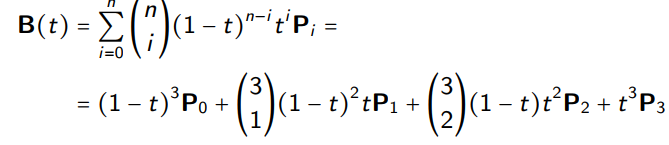

$$
(1-t)^3 \binom{3}{1} + 3 \ (1-t)^2 \ t \binom{5}{8} + 3 \ (1-t) \ t^2 \binom{6}{2} + t^3 \ \binom{8}{5} = \binom{3 \ (1-t)^3 + 15 \ (1-t)^2 \ t + 18 \ (1-t) \ t^2 + 8 t^3}{(1-t)^3 + 24 \ (1-t)^2 \ t + 6 \ (1-t) \ t^2 + 5 t^3}
$$

In [97]:
def draw_func():
    import matplotlib.pyplot as plt
    
    t = np.linspace(0,1.,1000)

    x = 3*(1-t)**3 + 15*(1-t)**2 + 18*(1-t)*t**2 + 8*t**3
    y = (1-t)**3 + 24*(1-t)**2 + 6*(1-t)*t**2 + 5*t**3

    # the function, which is y = x^2 here
    
    # setting the axes at the centre
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x,y, 'r')
    plt.title('Кривая Безье', fontsize=16)

    # show the plot
    plt.show();

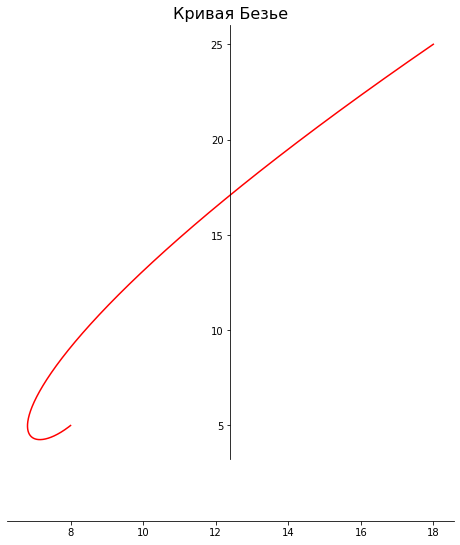

In [98]:
draw_func()

## Задача №5

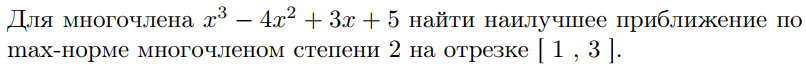

**норма:**
$$|h|_0=\max_{[1,3]}{|h(x)|}$$

Возьмем многочлен:
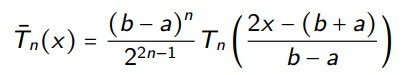

он будет наименее отклонятся от нуля относительно искомой нормы на нашем отрезке среди многочленов степени n со старшим коэффициентом 1

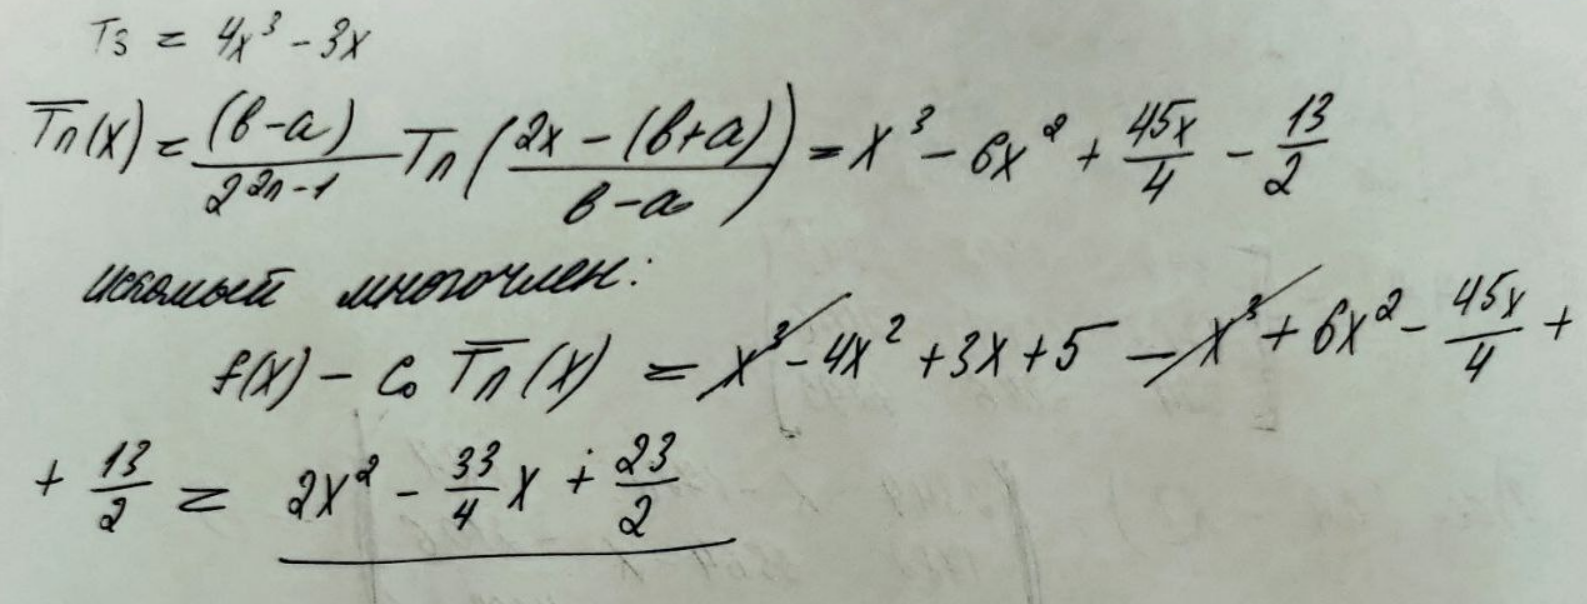

## Задача №6

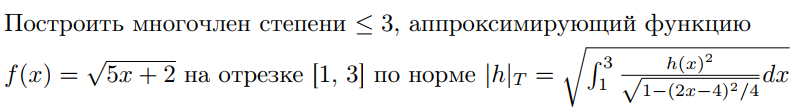

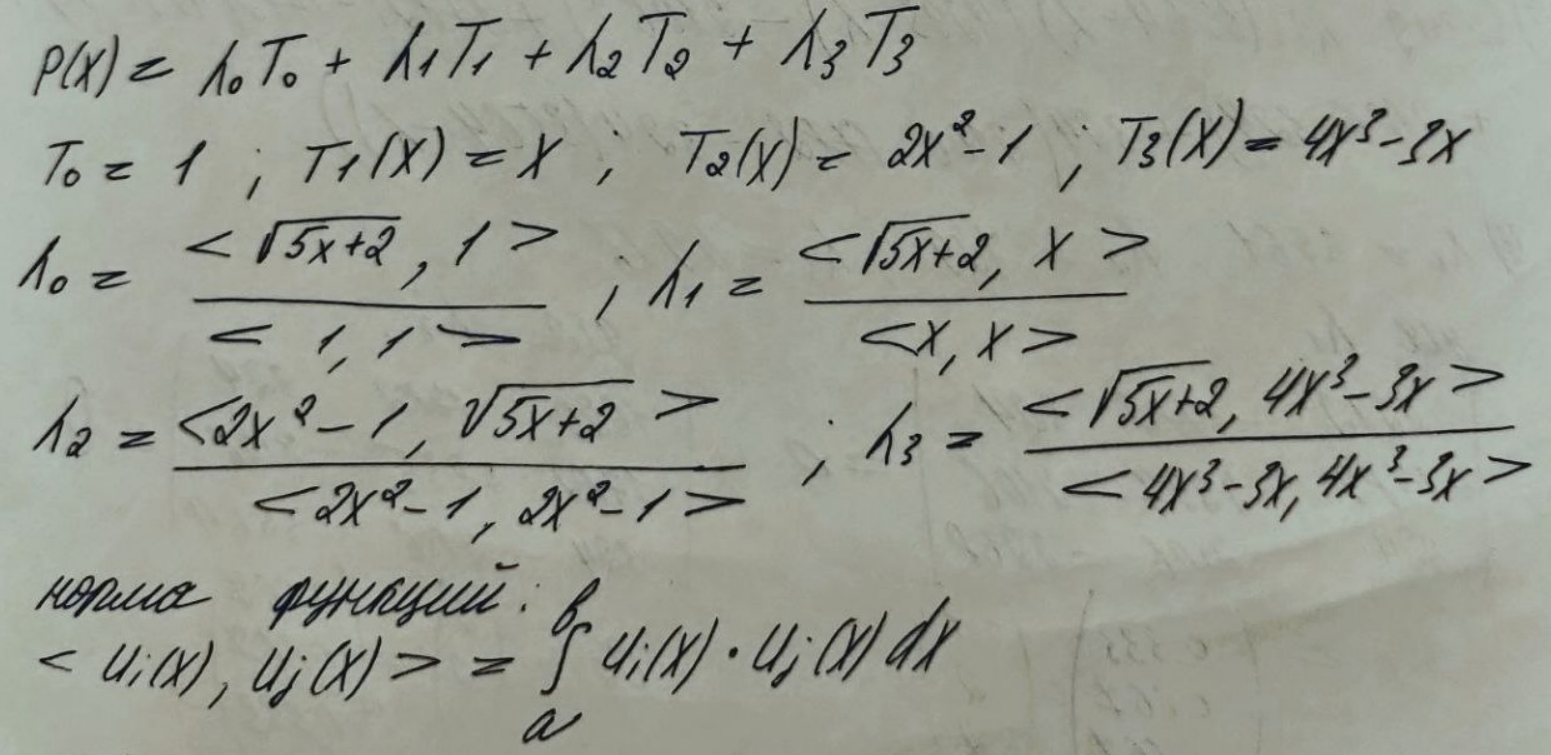

In [102]:
import scipy.integrate as integrate
from numpy import sqrt
lam0 = integrate.quad(lambda x: sqrt(5*x + 2), 1, 3)
lam1 = integrate.quad(lambda x: sqrt(5*x + 2)*x, 1, 3)[0] / integrate.quad(lambda x: x*x, 1, 3)[0]
lam2 = integrate.quad(lambda x: sqrt(5*x + 2)*(2*x**2-1), 1, 3)[0] / integrate.quad(lambda x: (2*x**2-1)*(2*x**2-1), 1, 3)[0]
lam3 = integrate.quad(lambda x: sqrt(5*x + 2)*(4*x**3 - 3*x), 1, 3)[0] / integrate.quad(lambda x: (4*x**3 - 3*x)*(4*x**3 - 3*x), 1, 3)[0]

**Подставим полученные коэффициенты в выражение p(x):**

$$1 \cdot 6.876 + 1.643 \cdot x + 0.352 \cdot (2 \cdot x^2-1) + 0.066 \cdot (4 \cdot x^3-3 \cdot x)=0.253 \cdot x^3 + 0.704 \cdot x^2 + 1.445 \cdot x + 6.876$$ 

## Задача №7

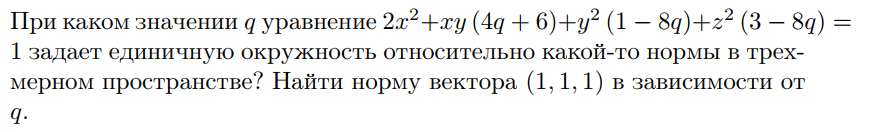

## Задача №8

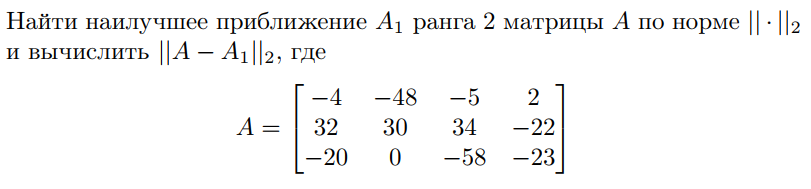

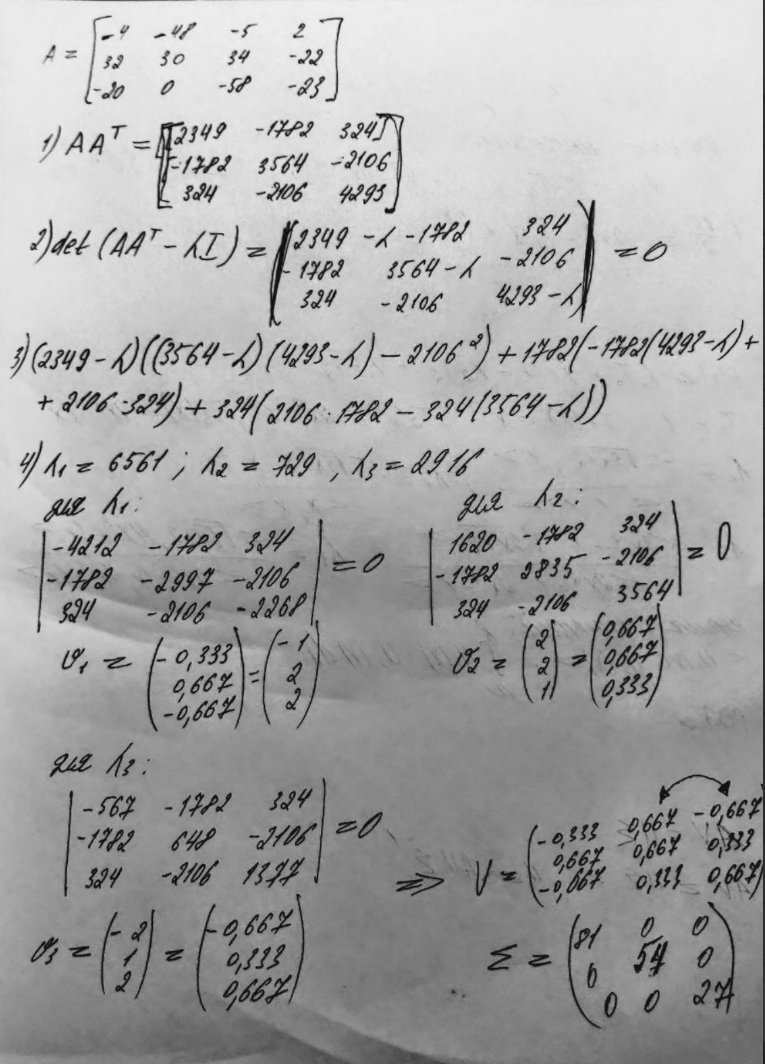

**Проверка:**

In [160]:
U,D,V = np.linalg.svd(np.array([[-4,-48,-5,2],[32,30,34,-22], [-20, 0, -58, -23]]), full_matrices=False)
D[-1] = 0
(U.dot(np.diag(D))).dot(V)

array([[-12., -40.,  -5.,  16.],
       [ 24.,  38.,  34.,  -8.],
       [-24.,   4., -58., -16.]])

## Задача №9

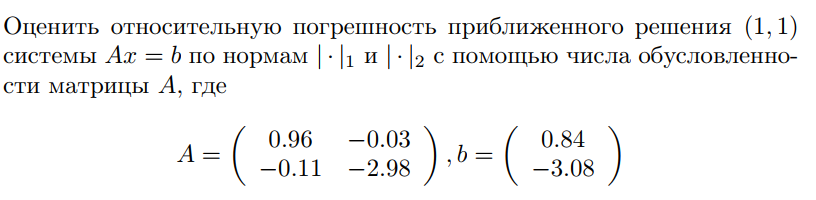

Точное решение для (1,1) имеет вид:
$$
\begin{bmatrix}
    1 &  0 \\
    0 &  -3
\end{bmatrix}
=
\begin{bmatrix}
    1  \\
    -3
\end{bmatrix}
$$

Найдем погрешность приближенного решения по формуле:
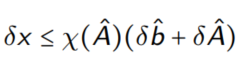

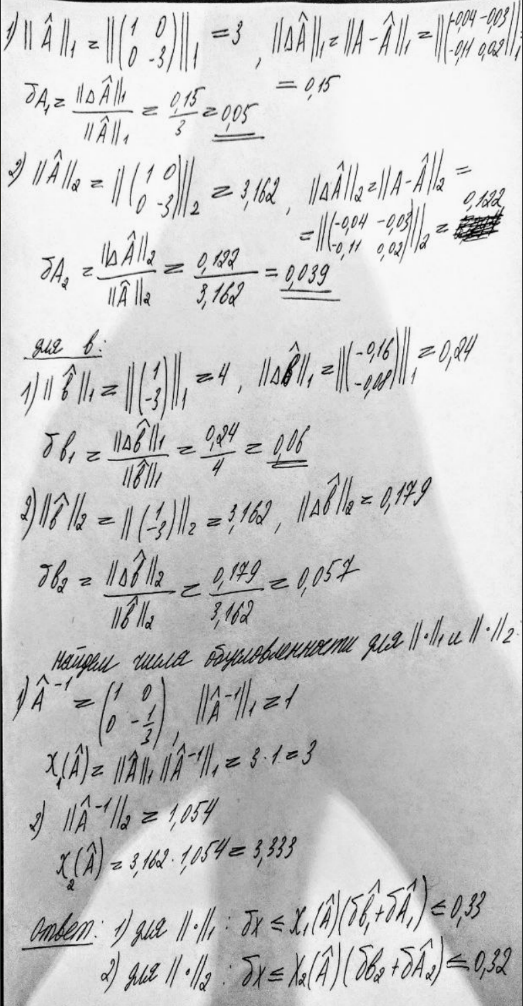

## Задача №10

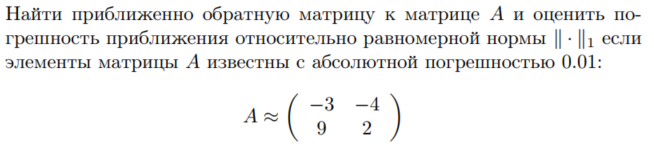

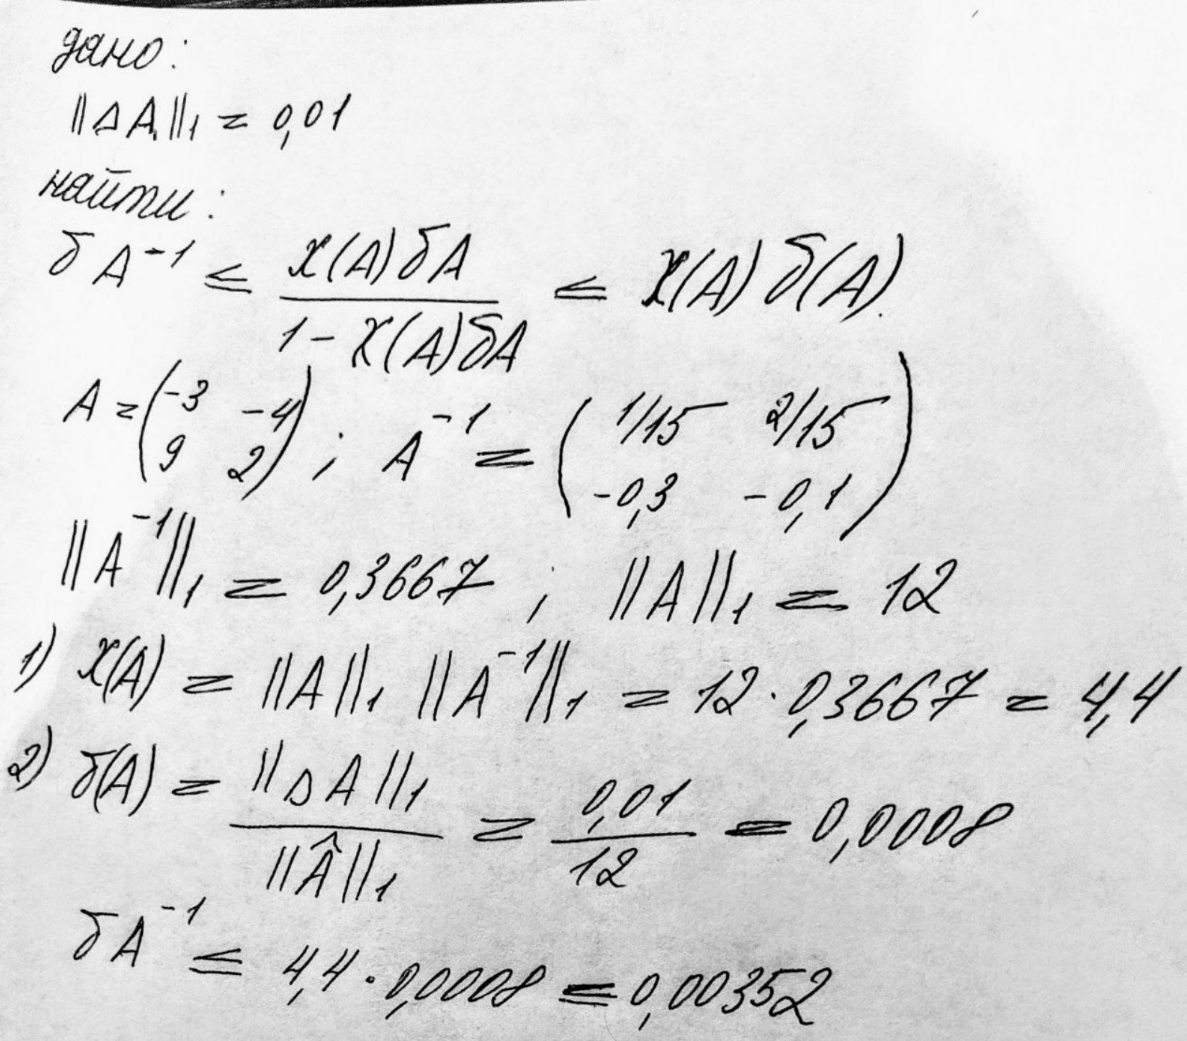